
# Spring-slider simulations with Rate and State Friction (RSF)

We start by importing the necessary libraries and pointing to the QDYN executable:

In [13]:
# Make plots interactive in the notebook
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import os
import sys

# Add QDYN source directory to PATH
base_dir = os.path.expanduser("~")
qdyn_dir = os.path.join(base_dir, "qdyn", "qdyn")
sys.path.append(qdyn_dir)

# Import QDYN wrapper
from pyqdyn import qdyn

The simulation parameters are accessible after instantiation of the QDYN class as a Python dictionary object. We first define a number of global simulation parameters:

In [53]:
# Instantiate the QDYN class object
p = qdyn()

# Get the settings dict
set_dict = p.set_dict

# Global simulation parameters
set_dict["MESHDIM"] = 0        # Simulation dimensionality (spring-block)
set_dict["TMAX"] = 300         # Maximum simulation time [s]
set_dict["NTOUT_OT"] = 2       # Temporal interval (number of time steps) for time series output
set_dict["V_PL"] = 1e-5        # Load-point velocity [m/s]
set_dict["MU"] = 2e9           # Shear modulus [Pa]
set_dict["SIGMA"] = 5e6        # Effective normal stress [Pa]
set_dict["ACC"] = 1e-7         # Solver accuracy
set_dict["SOLVER"] = 2         # Solver type (Runge-Kutta)

# To switch to rate-and-state friction ("RSF")
set_dict["FRICTION_MODEL"] = "RSF"

We then overwrite the default values of specific rheological parameters:

In [54]:
set_dict["SET_DICT_RSF"]["RNS_LAW"] = 0                # Classical rate-and-state
set_dict["SET_DICT_RSF"]["THETA_LAW"] = 1             # Ageing law
set_dict["SET_DICT_RSF"]["A"] = 0.01                  # Direct effect parameter [-]
set_dict["SET_DICT_RSF"]["B"] = 0.015                 # Evolution effect parameters [-]
set_dict["SET_DICT_RSF"]["DC"] = 1e-5                 # Characteristic slip distance [m]
set_dict["SET_DICT_RSF"]["V_SS"] = set_dict["V_PL"]   # Reference velocity [m/s]

# Initial slip velocity [m/s]
set_dict["SET_DICT_RSF"]["V_0"] = 1.01 * set_dict["V_PL"]
# Initial state [s]
set_dict["SET_DICT_RSF"]["TH_0"] = set_dict["SET_DICT_RSF"]["DC"] / set_dict["V_PL"]


Lastly, we pass the settings to the QDYN wrapper, generate the mesh (only 1 element) and write the `qdyn.in` input file:

In [55]:
p.settings(set_dict)
p.render_mesh()
p.write_input()

True

The `p.write()` command writes a `qdyn.in` file to the current working directory, which is read by QDYN at the start of the simulation. To do this, call `p.run()`. Note that in this notebook, the screen output (`stdout`) is captured by the console, so you won't see any output here.

In [56]:
p.run()

True

The simulation output is read and processed by the wrapper using:

In [60]:
p.read_output(read_ox=False)

True

The simulation time series output is then stored in `p.ot`

In [61]:
p.ot[0]

,step,t,potcy,pot_rate,v,theta,tau,dtau_dt,slip,sigma,fault_label
0,0,0.000000,0.000000e+00,1.010000e-05,1.010000e-05,1.000000,3000498.0,0.0,0.000000e+00,5000000.0,1
1,5,0.009713,9.802442e-08,1.010099e-05,1.010099e-05,0.999911,3000496.0,0.0,9.802442e-08,5000000.0,1
2,10,1.922708,1.956686e-05,1.021217e-05,1.021217e-05,0.983710,2999818.0,0.0,1.956686e-05,5000000.0,1
3,15,5.038311,5.094019e-05,9.860126e-06,9.860126e-06,1.001171,2999383.0,0.0,5.094019e-05,5000000.0,1
4,20,7.853481,7.844153e-05,9.799176e-06,9.799176e-06,1.022905,3000684.0,0.0,7.844153e-05,5000000.0,1
...,...,...,...,...,...,...,...,...,...,...,...
215,1075,283.441493,2.968800e-03,3.461222e-06,3.461222e-06,0.056733,2731747.0,0.0,2.968800e-03,5000000.0,1
216,1080,284.069255,2.969098e-03,1.063264e-07,1.063264e-07,0.678396,2743707.0,0.0,2.969098e-03,5000000.0,1
217,1085,290.269998,2.969326e-03,3.964578e-08,3.964578e-08,6.801406,2867267.0,0.0,2.969326e-03,5000000.0,1
218,1090,298.892572,2.970565e-03,4.048859e-07,4.048859e-07,13.934470,3037241.0,0.0,2.970565e-03,5000000.0,1


To see the behaviour of our spring-block fault, we can plot the time series of (normalised) shear stress, porosity, and slip velocity:

<IPython.core.display.Javascript object>


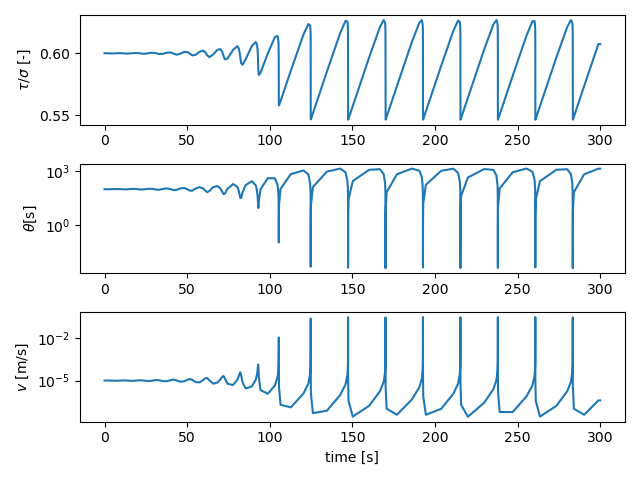

In [65]:
plt.figure()

# Normalised shear stress
plt.subplot(311)
plt.plot(p.ot[0]["t"], p.ot[0]["tau"] / set_dict["SIGMA"])
plt.ylabel(r"$\tau / \sigma$ [-]")

# Porosity
plt.subplot(312)
plt.semilogy(p.ot[0]["t"], 100 * p.ot[0]["theta"])
plt.ylabel(r"$\theta$[s]")

# Velocity
plt.subplot(313)
plt.plot(p.ot[0]["t"], p.ot[0]["v"])
plt.yscale("log")
plt.ylabel(r"$v$ [m/s]")
plt.xlabel("time [s]")

plt.tight_layout()
plt.show()